In [ ]:
import numpy as np 
import pandas as pd
import networkx as nx

In [ ]:

def construct_pg_edge(g, prev_pg_id, cur_pg_id, genome_id, sequence_id):
    edge_data=g.get_edge_data(prev_pg_id, cur_pg_id, default=None)
    if edge_data != None:
        edge_data["genomes"].add(genome_id)
        edge_data["sequences"].add(sequence_id)
    else:
        g.add_edge(prev_pg_id, cur_pg_id, genomes=set([genome_id]), sequences=set([sequence_id]))

In [60]:
g = nx.DiGraph()
g.add_nodes_from(range(9))
g.add_edge(0,1)
g.add_edge(0,2)
g.add_edge(1,3)
g.add_edge(2,4)
g.add_edge(4,5)
g.add_edge(3,6)
g.add_edge(5,6)
g.add_edge(2,7)
g.add_edge(7,4)
g.add_edge(7,8)
g.add_edge(8,5)

# # g.add_edges_from([(start, start+1) for start in range(9)])
# g.add_edge(1,9, genomes=set(["111.1"]), sequences=set(["sequence.1"]))
# construct_pg_edge(g, 2, 3, "222.2", "sequence.2")

In [ ]:
for edge in g.edges:
    print(edge)
    print(g.edges[edge])

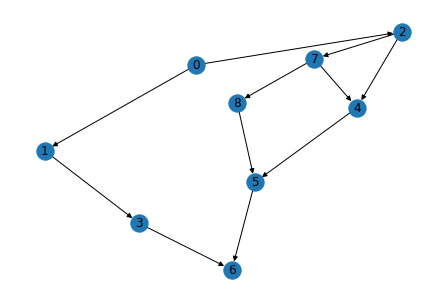

In [68]:
nx.draw(g, with_labels=True)

In [90]:
[i for i in g.predecessors(4)]

[2, 7]

In [92]:
g.out_degree(4)

1

In [ ]:
# g = nx.readwrite.read_gexf("../test_data/digraph_test.gexf")

In [81]:
def topo_sort(g, start_node):
    nodes = g.nodes()
    node_status = {i:False for i in nodes}
    sorted_nodes = []

    def topo_sort_helper(g, node):
        if not node_status[node]:
            node_status[node] = True
            for neighbor in g.neighbors(node):
                topo_sort_helper(g, neighbor)
            sorted_nodes.append(node)
    
    topo_sort_helper(g, start_node)
    return sorted_nodes[::-1]

In [82]:
topo_sort(g, 0)

[0, 2, 7, 8, 4, 5, 1, 3, 6]

In [86]:
node_info = {i:{"index":ix, "source":None, "sink":None} for ix, i in enumerate(topo_sort(g, 0))}
node_info

{0: {'index': 0, 'source': None, 'sink': None},
 2: {'index': 1, 'source': None, 'sink': None},
 7: {'index': 2, 'source': None, 'sink': None},
 8: {'index': 3, 'source': None, 'sink': None},
 4: {'index': 4, 'source': None, 'sink': None},
 5: {'index': 5, 'source': None, 'sink': None},
 1: {'index': 6, 'source': None, 'sink': None},
 3: {'index': 7, 'source': None, 'sink': None},
 6: {'index': 8, 'source': None, 'sink': None}}

In [83]:
for ix, i in np.argsort(topo_sort(g, 0)): #The index of each node, in sorted id order
    

array([0, 6, 1, 7, 4, 5, 8, 2, 3])

In [113]:
def identify_entrance_exit_nodes(g, start_node):
    
    sorted_nodes = topo_sort(g, start_node)
    node_candidates = []
    prev_entrances = []
    prev_ent = None
    
    for ix, node in enumerate(sorted_nodes):
        prev_entrances.append(prev_ent)
        is_entrance = False
        is_exit = False
        for parent in g.predecessors(node):
            if g.out_degree(parent) == 1:
                is_exit = True
                node_candidates.append((node, "Exit"))
                break
            
        for child in g.successors(node):
            if g.in_degree(child) == 1:
                is_entrance = True
                node_candidates.append((node, "Entrance"))
                prev_ent = node
                break
        sorted_nodes[ix] = (node, is_entrance, is_exit)
    return node_candidates, prev_entrances

def super_bubble(g, start_node):
    
#     sorted_nodes = topo_sort(g, start_node)
    node_candidates = []
    prev_entrances = dict()
    prev_ent = None
    
    for ix, node in enumerate(sorted_nodes):
        prev_entrances[node] = prev_ent
        is_entrance = False
        is_exit = False
        for parent in g.predecessors(node):
            if g.out_degree(parent) == 1:
                is_exit = True
                node_candidates.append((node, "Exit"))
                break
            
        for child in g.successors(node):
            if g.in_degree(child) == 1:
                is_entrance = True
                node_candidates.append((node, "Entrance"))
                prev_ent = node
                break
#         sorted_nodes[ix] = (node, is_entrance, is_exit)
    
#     node_candidates, prev_entrances = identify_entrance_exit_nodes(g, start_node)
    alternative_entrances = {i:None for i in prev_entrances}
    topo_order = {i[0]:ix for ix, i in enumerate(node_candidates)}    
#     node_candidates, prev_entrances = node_candidates[::-1], prev_entrances[::-1] #Need to operate on them in reverse order
    entrances = [node[0] for node in node_candidates if node[1] == "Entrance"]
    
    def report_superbubble(start, exit):
        if start is None or exit is None or topo_order[start] >= topo_order[exit]:
            node_candidates.pop()
            return
        s = prev_entrances[exit]
        while topo_order[s] >= topo_order[start]:
            valid = validate_supperbubble(s, exit)
    
    for node, status in node_candidates:
        if status == "Entrance":
            continue
        else:
            report_superbubble(node, entrances)
            


In [120]:
identify_entrance_exit_nodes(g, 0)


([(0, 'Entrance'),
  (2, 'Entrance'),
  (7, 'Entrance'),
  (5, 'Exit'),
  (1, 'Entrance'),
  (3, 'Exit'),
  (6, 'Exit')],
 [None, 0, 2, 7, 7, 7, 7, 1, 1])